In [1]:
from matplotlib.legend_handler import update_from_first_child
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

ts = 0.0001 
url = 'https://raw.githubusercontent.com/PinkWink/for_ROS2_study/refs/heads/main/%EA%B3%B5%EC%A7%9C%EC%88%A0/filter%20tutorials/exVelocityCalcRawData.csv'
raw_data = pd.read_csv(url)
raw_data = raw_data.drop(raw_data.columns[0], axis = 1)
raw_data.head() 

,time,Position
0,0.0001,165.879903
1,0.0002,165.879903
2,0.0003,165.879903
3,0.0004,165.879903
4,0.0005,165.879903


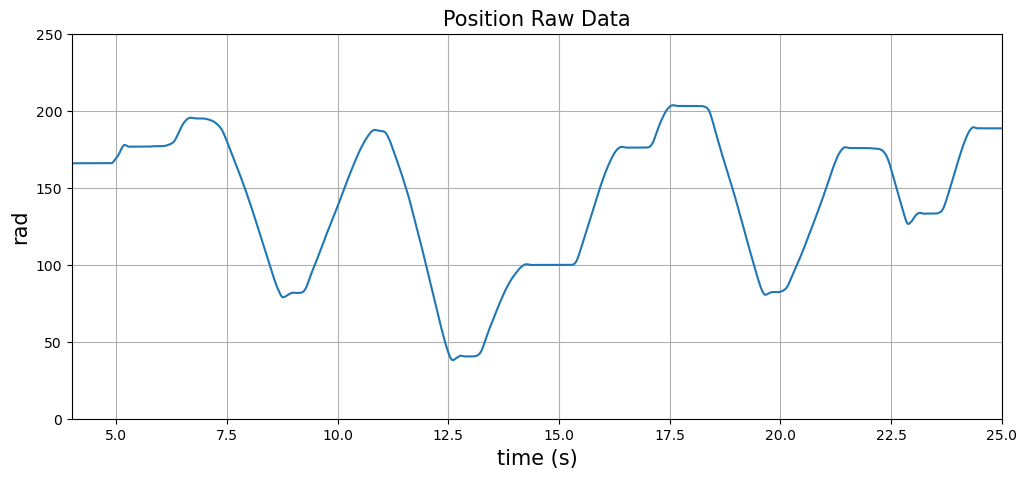

In [2]:
plt.figure(figsize=(12,5))
plt.plot(raw_data.time, raw_data.Position)
plt.title('Position Raw Data', size=15)
plt.xlabel('time (s)', size=15)
plt.ylabel('rad', size=15)
plt.axis([4, 25, 0, 250])
plt.grid(True)

In [3]:
vel_diff = np.zeros(len(raw_data.time))

for i in np.arange(1,len(raw_data.time)):
    vel_diff[i] = (raw_data.Position[i] - raw_data.Position[i-1])/ts 
    
raw_data['vel_diff'] = vel_diff

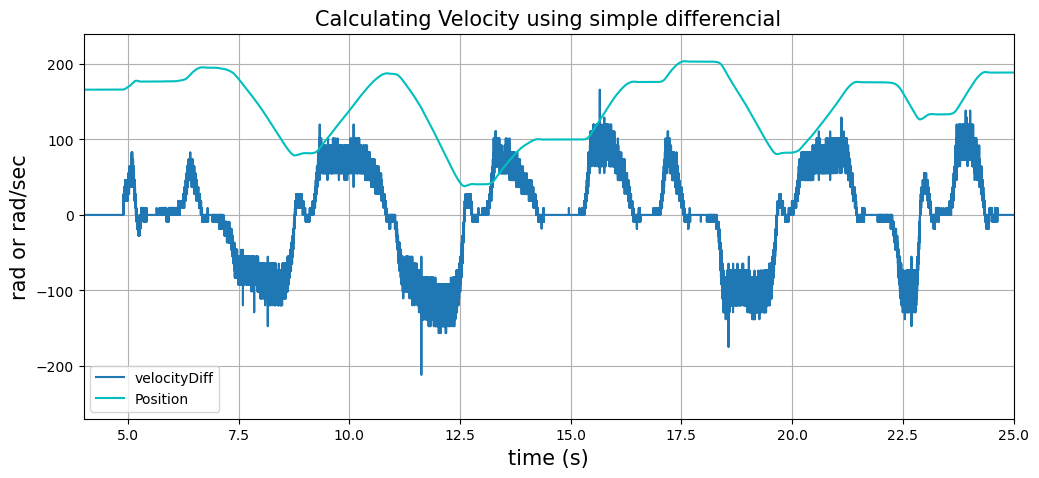

In [4]:
plt.figure(figsize=(12,5))
plt.plot(raw_data.time, raw_data.vel_diff, raw_data.time, raw_data.Position, 'c')
plt.xlabel('time (s)', size=15)
plt.ylabel('rad or rad/sec', size=15)
plt.title('Calculating Velocity using simple differencial', size=15)
plt.legend(['velocityDiff', 'Position'])
plt.axis([4, 25, -270, 240])
plt.grid(True)

In [5]:
ts, ts/(0.01+ts )

(0.0001, 0.009900990099009901)

In [6]:
from signal_processor import SignalProcessor
sp = SignalProcessor(window_size=100, alpha=0.0099) 

lp = []

for val in raw_data.vel_diff:
    lp.append(sp.low_pass_filter(val))

raw_data['vel_LPF'] = lp

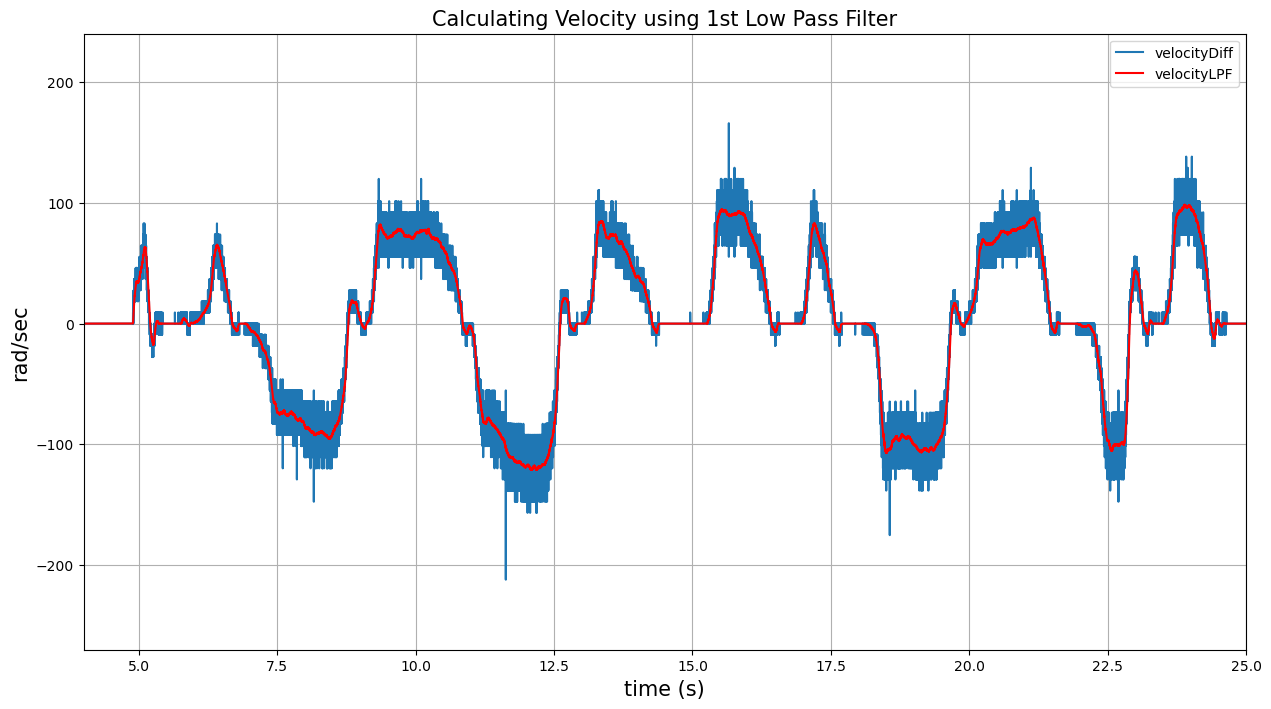

In [7]:
plt.figure(figsize=(15,8))
plt.plot(raw_data.time, raw_data.vel_diff, raw_data.time, raw_data.vel_LPF, 'r')
plt.xlabel('time (s)', size=15)
plt.ylabel('rad/sec', size=15)
plt.title('Calculating Velocity using 1st Low Pass Filter', size=15)
plt.legend(['velocityDiff', 'velocityLPF'])
plt.axis([4, 25, -270, 240])
plt.grid(True)

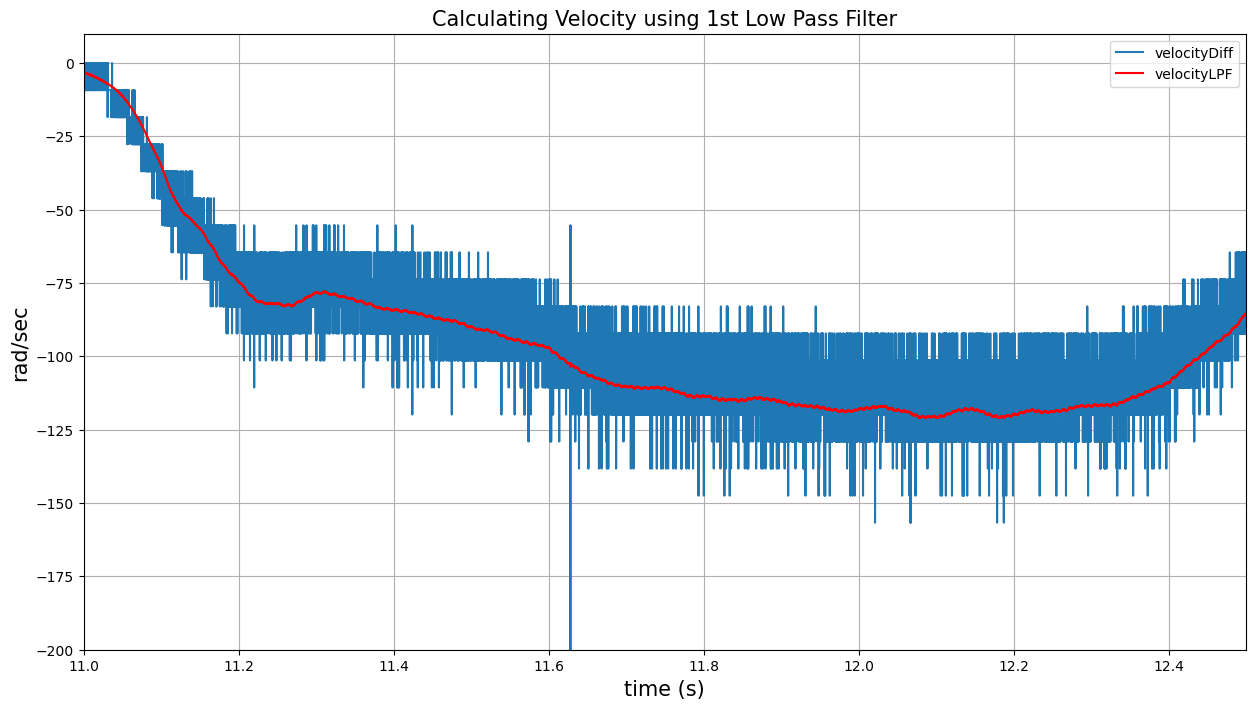

In [8]:
plt.figure(figsize=(15,8))
plt.plot(raw_data.time, raw_data.vel_diff, raw_data.time, raw_data.vel_LPF, 'r')
plt.xlabel('time (s)', size=15)
plt.ylabel('rad/sec', size=15)
plt.title('Calculating Velocity using 1st Low Pass Filter', size=15)
plt.legend(['velocityDiff', 'velocityLPF'])
plt.axis([11, 12.5, -200, 10])
plt.grid(True)

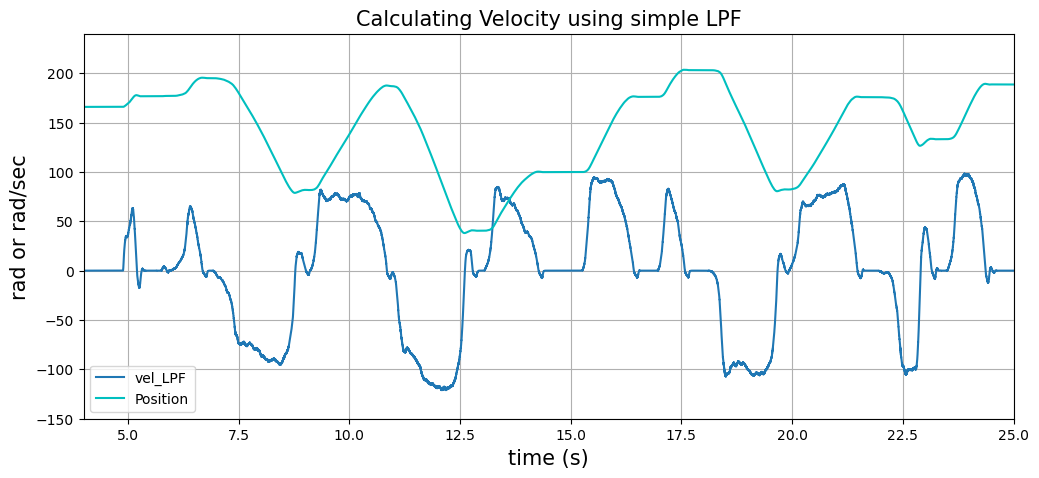

In [9]:
plt.figure(figsize=(12,5))
plt.plot(raw_data.time, raw_data.vel_LPF, raw_data.time, raw_data.Position, 'c')
plt.xlabel('time (s)', size=15)
plt.ylabel('rad or rad/sec', size=15)
plt.title('Calculating Velocity using simple LPF', size=15)
plt.legend(['vel_LPF', 'Position'])
plt.axis([4, 25, -150, 240])
plt.grid(True)

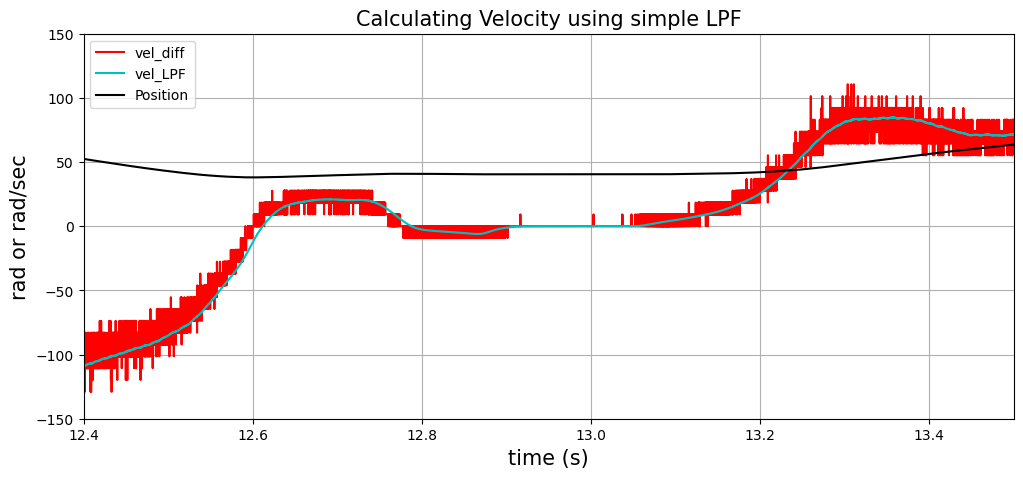

In [10]:
plt.figure(figsize=(12,5))
plt.plot(   raw_data.time, raw_data.vel_diff, 'r',
            raw_data.time, raw_data.vel_LPF, 'c', 
            raw_data.time, raw_data.Position, 'k')
plt.xlabel('time (s)', size=15)
plt.ylabel('rad or rad/sec', size=15)
plt.title('Calculating Velocity using simple LPF', size=15)
plt.legend(['vel_diff', 'vel_LPF', 'Position'])
plt.axis([12.4, 13.5, -150, 150])
plt.grid(True)

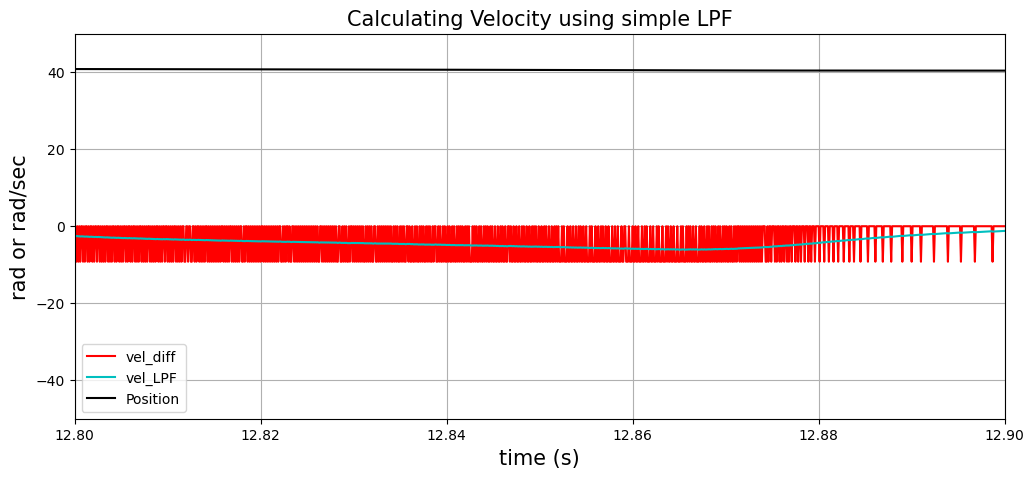

In [11]:
plt.figure(figsize=(12,5))
plt.plot(   raw_data.time, raw_data.vel_diff, 'r',
            raw_data.time, raw_data.vel_LPF, 'c', 
            raw_data.time, raw_data.Position, 'k')
plt.xlabel('time (s)', size=15)
plt.ylabel('rad or rad/sec', size=15)
plt.title('Calculating Velocity using simple LPF', size=15)
plt.legend(['vel_diff', 'vel_LPF', 'Position'])
plt.axis([12.8, 12.9, -50, 50])
plt.grid(True)